In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from tqdm import tqdm
import math
from astropy.io import fits
import astropy.units as u

from scipy.interpolate import RegularGridInterpolator
#from dust_extinction.parameter_averages import F99
from dust_extinction.parameter_averages import G23
from scipy.signal import savgol_filter

from scipy.optimize import curve_fit
import matplotlib.cm as cm
import pylatex

In [3]:
t = Table.read('boss-ysos-veiling.fits')

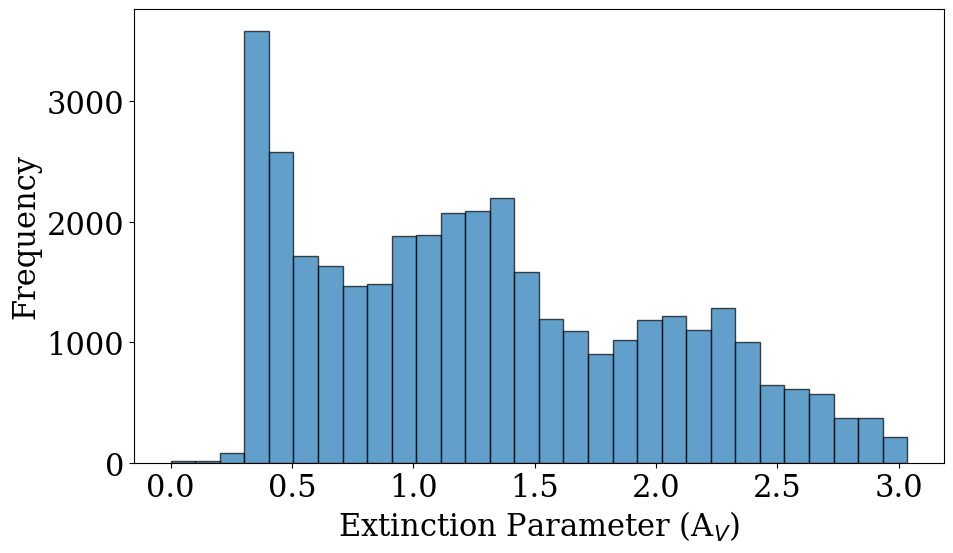

In [17]:
av_data = t['av'][t['av'] > 0]

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 22
})

fig = plt.figure(figsize=(10, 6))
plt.hist(av_data, bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Extinction Parameter (A$_V$)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Figures/av_hist.pdf')
plt.show()

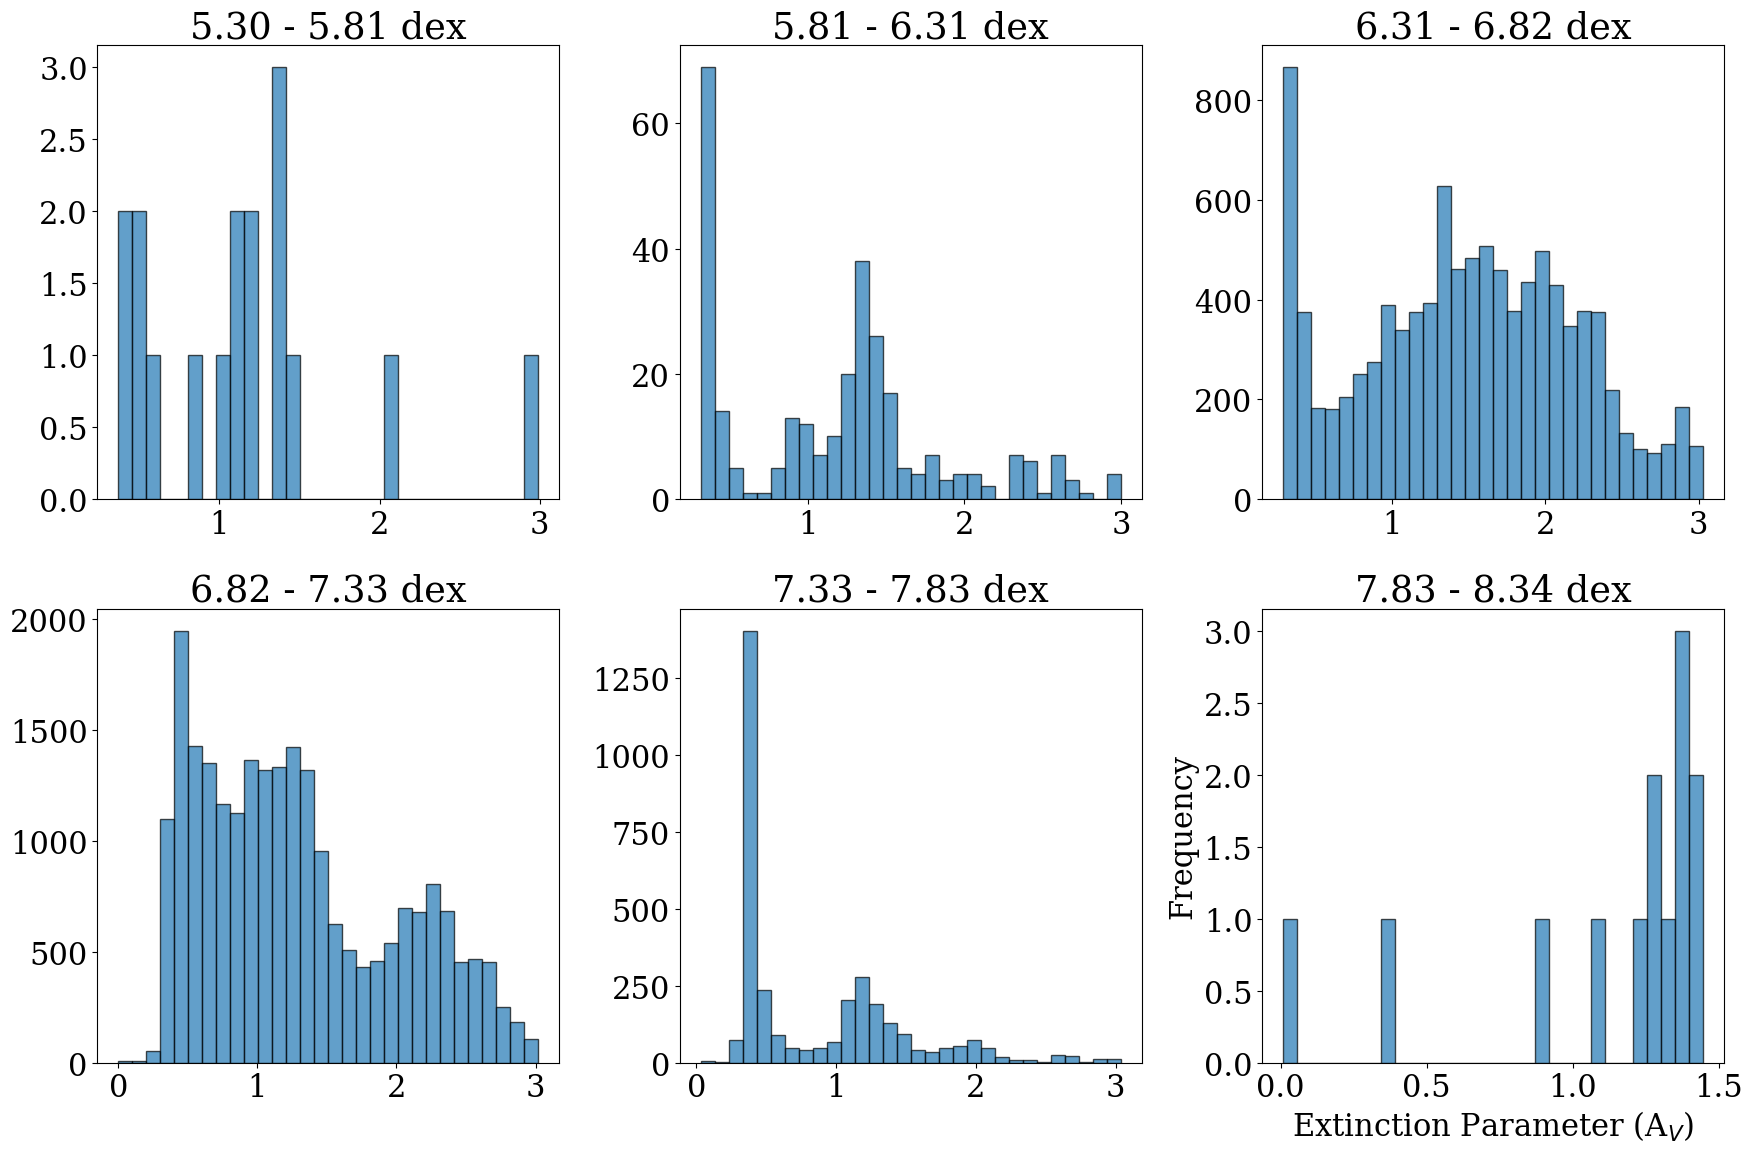

In [19]:
min_age = 5.300321
max_age = 8.339497
num_intervals = 6
interval_size = (max_age - min_age) / num_intervals

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 22
})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i in range(num_intervals):
    age_min = min_age + i * interval_size
    age_max = min_age + (i + 1) * interval_size
    av_data = t['av'][(t['av'] > 0) & (t['age'] >= age_min) & (t['age'] < age_max)]
    
    axes[i].hist(av_data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{age_min:.2f} - {age_max:.2f} dex')


plt.xlabel('Extinction Parameter (A$_V$)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Figures/av_hist_age_ranges.pdf')
plt.show()
